In [263]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor


In [264]:
# open file with pd.read_csv
data = pd.read_csv(r"C:\Users\nijat\Desktop\PYTHON - KURS\Ders 19 - practice\blood.csv")
data

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


In [265]:
data['Class'] = data['Class'].replace(1, 0)
data

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [266]:
data['Class'] = data['Class'].replace(2, 1)
data

,V1,V2,V3,V4,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [267]:
data['Class'].value_counts()

0    570
1    178
Name: Class, dtype: int64

In [268]:
data.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [269]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [270]:
data.corr()['Class']

V1      -0.279869
V2       0.218633
V3       0.218633
V4      -0.035854
Class    1.000000
Name: Class, dtype: float64

In [271]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')

In [272]:
data = data[['V1', 'V2', 'V3', 'Class']]
data

,V1,V2,V3,Class
0,2,50,12500,1
1,0,13,3250,1
2,1,16,4000,1
3,2,20,5000,1
4,1,24,6000,0
...,...,...,...,...
743,23,2,500,0
744,21,2,500,0
745,23,3,750,0
746,39,1,250,0


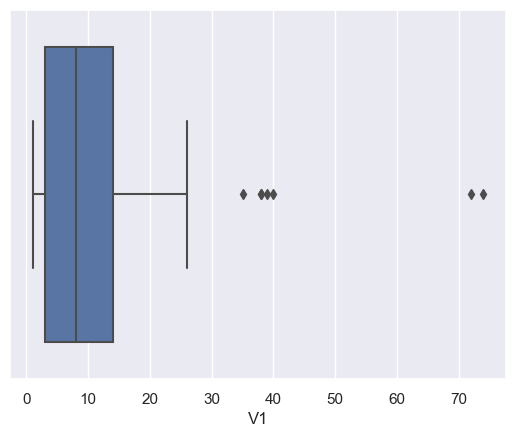

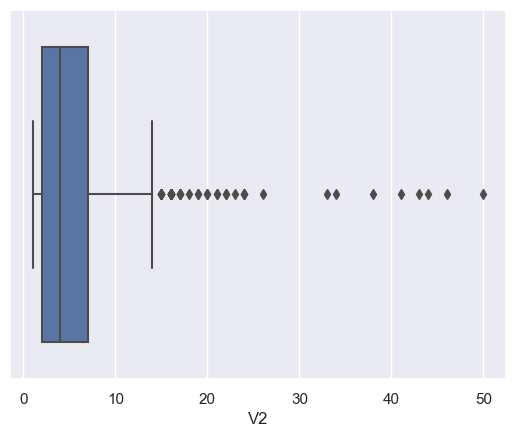

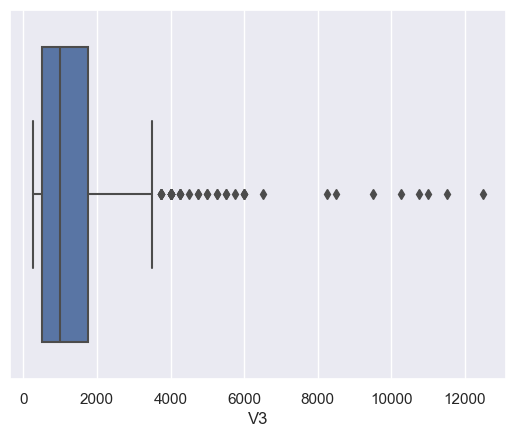

In [273]:
for i in data.iloc[:,0:-1]:
    sns.boxplot(data = data, x = df[i])
    plt.show()

In [274]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\3516467820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\3516467820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


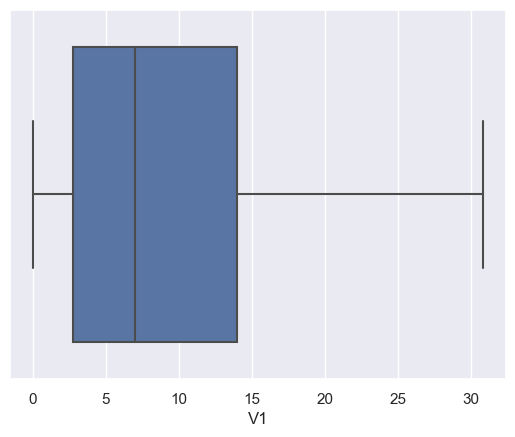

C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\3516467820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\3516467820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


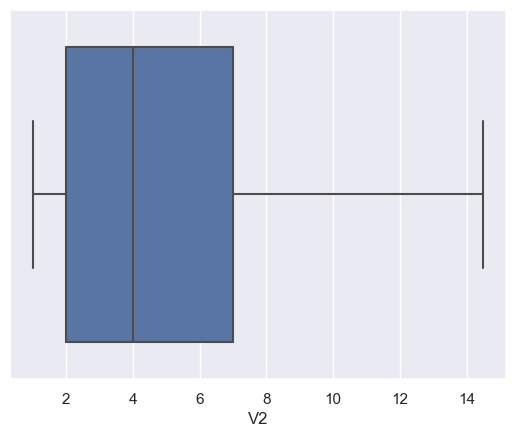

C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\3516467820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\3516467820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


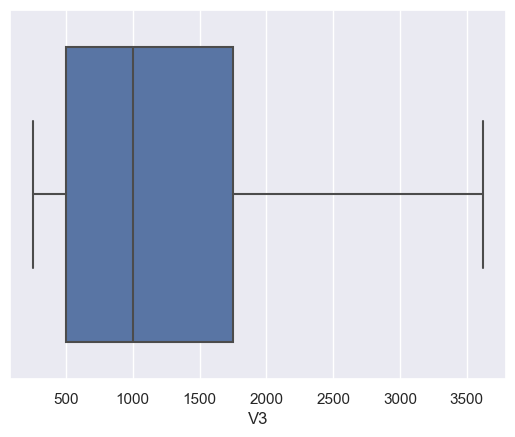

In [275]:
for i in data.iloc[:,0:-1]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [276]:
data.columns

Index(['V1', 'V2', 'V3', 'Class'], dtype='object')

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['V1', 'V2']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,1.400079,V1
1,1.400079,V2


In [278]:
data = data[['V1', 'V2', 'Class']]

In [288]:
data

,V1,V2,Class
0,2.000,14.5,1
1,0.000,13.0,1
2,1.000,14.5,1
3,2.000,14.5,1
4,1.000,14.5,0
...,...,...,...
743,23.000,2.0,0
744,21.000,2.0,0
745,23.000,3.0,0
746,30.875,1.0,0


In [314]:
X = data[['V1', 'V2']]
y = data[['Class']]

In [315]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 # Decision Tree Classification

In [316]:
from sklearn.tree import DecisionTreeClassifier

In [317]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [318]:
y_pred = dt.predict(X_test)

In [319]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [320]:
confusion_matrix(y_pred, y_test)

array([[156,  46],
       [  9,  14]], dtype=int64)

In [321]:
accuracy_score(y_pred, y_test)

0.7555555555555555

In [322]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_pred, y_test)*100)

AUC Score: 69.04864399483428


In [323]:
Gini = ((roc_auc_score(y_pred, y_test)*2)-1)*100

Gini

38.09728798966856

# Random Forest Classification

In [324]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [325]:
rfc.fit(X_train, y_train)

C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\1542427849.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [326]:
y_predRF = rfc.predict(X_test)

In [327]:
confusion_matrix(y_predRF, y_test)

array([[155,  46],
       [ 10,  14]], dtype=int64)

In [328]:
accuracy_score(y_predRF, y_test)*100

75.1111111111111

In [329]:
print('AUC Score:', roc_auc_score(y_predRF, y_test)*100)

AUC Score: 67.72388059701493


In [330]:
Gini = ((roc_auc_score(y_predRF, y_test)*2)-1)*100

Gini

35.44776119402986

# Random Forest classification with hyperparameter optimization

In [331]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [332]:

# the verbose parameter above will give output updates as the calculations are complete.
# n_jobs = -1 means using all processors

rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [333]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

In [334]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

In [335]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Gini pred is 16.81818181818184
Gini prob is 20.434343434343425


C:\Users\nijat\AppData\Local\Temp\ipykernel_7640\2731656288.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


In [336]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)


Model Performance
Gini pred is 16.21212121212121
Gini prob is 28.505050505050498


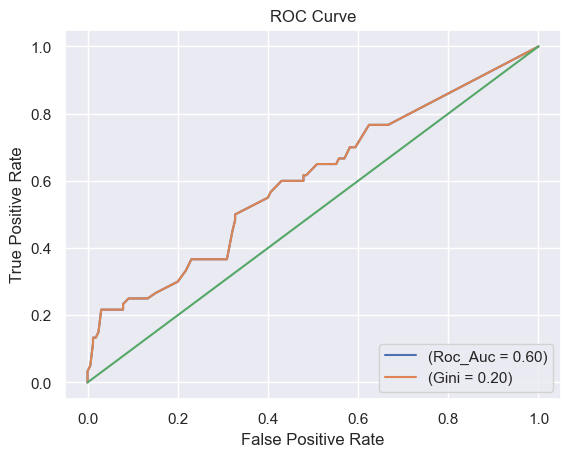

In [337]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

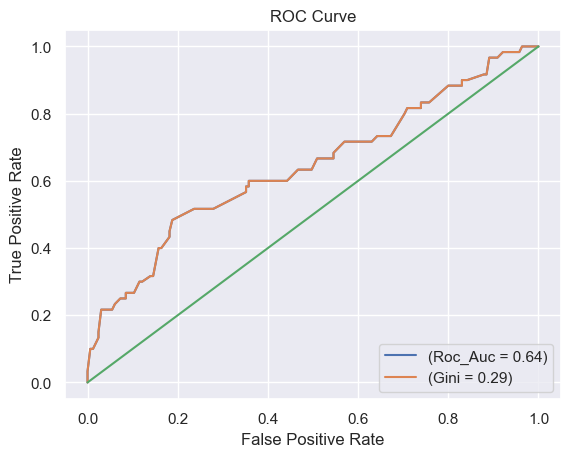

In [338]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Check

In [339]:
data

,V1,V2,Class
0,2.000,14.5,1
1,0.000,13.0,1
2,1.000,14.5,1
3,2.000,14.5,1
4,1.000,14.5,0
...,...,...,...
743,23.000,2.0,0
744,21.000,2.0,0
745,23.000,3.0,0
746,30.875,1.0,0


In [341]:
data_new = {
       'V1' : [5, 15, 35],
        'V2': [1, 45, 23]}
 
# Create DataFrame
data_new = pd.DataFrame(data_new)

In [342]:
data_new

,V1,V2
0,5,1
1,15,45
2,35,23


In [343]:
target=optimized_model.predict(data_new)
probability=optimized_model.predict_proba(data_new)[:,1]

In [344]:
target

array([0, 0, 0], dtype=int64)

In [345]:
probability

array([0.26576662, 0.02040383, 0.20506485])

In [346]:
data_new['Predicted_target'] = target
data_new['Predicted_probabilty'] = probability

In [347]:
data_new

,V1,V2,Predicted_target,Predicted_probabilty
0,5,1,0,0.265767
1,15,45,0,0.020404
2,35,23,0,0.205065
